<!-- Badges: -->

<!-- Title: -->
<div align="center">
  <h1><b> Two-qubit gates </b></h1>
  <h2> Quantum Circuit Theory and Implementations </h2>
</div>
<br>

<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a>

<div align='center'>
<table class="tfo-notebook-buttons" align="head">
  <td>
    <a target="_blank" href="https://github.com/QuCAI-Lab/quantum-circuit-theory"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
</table>
</div>

# Table of Contents

- CNOT gate.
- SWAP gate.
- $ZZ(t)$ gate.
- $XX(t)$ gate.
- $YY(t)$ gate.
- Verifying outer products.

In [1]:
%run 10_implementations.ipynb

Author: Lucas Camponogara Viera

Github username: camponogaraviera

Website: https://qucai-lab.github.io/

Last updated: 2023-06-08

Python implementation: CPython
Python version       : 3.11.2
IPython version      : 8.14.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.19.0-43-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Git repo: https://github.com/QuCAI-Lab/quantum-circuit-theory.git

Git branch: dev

IPython   : 8.14.0
sympy     : 1.11.1
numpy     : 1.23.5
pennylane : 0.28.0
matplotlib: 3.6.2
scipy     : 1.9.3
pylatexenc: 2.10
watermark : 2.3.1

Watermark: 2.3.1

{'commit_hash': 'f11276427',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': '/home/lucas/anaconda3/envs/qct/lib/python3.11/site-packages/IPython',
 'ipython_version': '8.14.0',
 'os_name': 'posix',
 'platform': 'Linux-5.19.0-43-generic-x86_64-with-glibc2.35',
 'sys_executable': '/home/lucas/anaconda3/envs/qct/bin/python',
 'sys_platf

# CNOT gate

[The $CNOT$ gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CXGate.html) (a.k.a $CX$): a two-qubit `Hermitian` and `Clifford` gate used to flip ($\pi$ radian) the state of the target qubit if the control qubit is in the state $|1\rangle$. It is similar to a classical XOR gate.

In the outerproduct representation, the CNOT gate with $q_0$ as control and $q_1$ as target reads:

$$CX^{q_0q_1} = \mathbb{I} \otimes |0\rangle\langle 0| + X \otimes |1 \rangle \langle 1|.$$

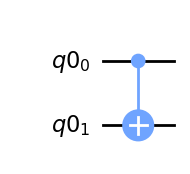

In [2]:
# CNOT gate with control qubit q0 and target qubit q1:

qr = QuantumRegister(2) # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr) # Create the circuit.
qc.cnot(0,1)
qc.draw(output='mpl')  

In [3]:
zero=np.array([[1,0]])
one = np.array([[0,1]])
sigma1 = np.array([[0,1],[1,0]], dtype=(np.float32)) 
outzero = zero.T@zero # Matrix of the outer product |0><0|.
outone = one.T@one # Matrix of the outer product |1><1|.
np.kron(np.eye(2), outzero) + np.kron(sigma1, outone)

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In textbook convention, the CNOT gate with $q_1$ as control and $q_0$ as target reads:

$$CX^{q_1q_0}=|0\rangle\langle 0|\otimes \mathbb{I} +|1\rangle\langle 1|\otimes X.$$

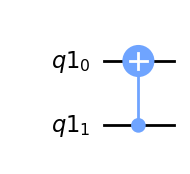

In [4]:
# CNOT gate with control qubit q1 and target qubit q0:

qr = QuantumRegister(2) # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr) # Create the circuit.
qc.cnot(1,0)
qc.draw(output='mpl')  

In [5]:
np.kron(outzero, np.eye(2)) + np.kron(outone, sigma1)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

## Action of CNOT gate

The action of the CNOT gate can be represented by: 

$$|q_0,q_1\rangle \rightarrow |q_0,q_0\oplus q_1\rangle.$$

$$CX|q_0q_1\rangle = |q_0\rangle \otimes |q_0\oplus q_1\rangle.$$

Where the $\oplus$ symbol denotes the classical exclusive-OR (XOR) operation (a.k.a direct sum).

Example:

Recall the mixed product property $(A\otimes B)(C\otimes D) = AC\otimes BD,$ and that, for orthonormal basis, $\langle i|j\rangle = \delta_{ij}.$

\begin{align}
CX_{01}|00\rangle &= CX_{01} (|0\rangle \otimes |0\rangle) = \Big(\mathbb{I} \otimes |0\rangle\langle 0| + X \otimes |1 \rangle \langle 1|\Big) (|0\rangle \otimes |0\rangle) \\
&= \Big(\mathbb{I} \otimes |0\rangle\langle 0|\Big) \Big(|0\rangle \otimes |0\rangle\Big) + \Big(X \otimes |1 \rangle \langle 1|\Big) \Big(|0\rangle \otimes |0\rangle\Big) \\
&= \Big(|0\rangle \otimes |0\rangle\langle 0|0\rangle\Big) + \Big(X|0\rangle \otimes |1 \rangle \langle 1| |0\rangle\Big) \\
&= |0\rangle \otimes |0\rangle.
\end{align}



Try to work out the math yourself for the following cases:

\begin{align}
CX_{01}|00\rangle &= |00\rangle\\
CX_{01}|01\rangle &= |11\rangle\\
CX_{01}|10\rangle &= |10\rangle\\
CX_{01}|11\rangle &= |01\rangle.
\end{align}

\begin{align}
CX_{10}|00\rangle &= |00\rangle\\
CX_{10}|01\rangle &= |01\rangle\\
CX_{10}|10\rangle &= |11\rangle\\
CX_{10}|11\rangle &= |10\rangle.
\end{align}

### Verifying for $CX_{01}$ with NumPy:

See the [10_implementations.ipynb](10_implementations.ipynb).

In [6]:
cnot_01@zero_zero # |00>

array([[1.],
       [0.],
       [0.],
       [0.]])

In [7]:
cnot_01@zero_one # |11>

array([[0.],
       [0.],
       [0.],
       [1.]])

In [8]:
cnot_01@one_zero # |10>

array([[0.],
       [0.],
       [1.],
       [0.]])

In [9]:
cnot_01@one_one # |01>

array([[0.],
       [1.],
       [0.],
       [0.]])

- Verifying for $CX_{10}$ with NumPy:

In [10]:
cnot_10@zero_zero # |00>

array([[1.],
       [0.],
       [0.],
       [0.]])

In [11]:
cnot_10@zero_one # |01>

array([[0.],
       [1.],
       [0.],
       [0.]])

In [12]:
cnot_10@one_zero # |11>

array([[0.],
       [0.],
       [0.],
       [1.]])

In [13]:
cnot_10@one_one # |10>

array([[0.],
       [0.],
       [1.],
       [0.]])

### Verifying for $CX_{01}$ with Qiskit:

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2)) 



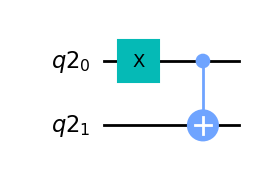

In [14]:
# cnot_01 |01> = |11>

backend = Aer.get_backend('unitary_simulator')
dec = 2                                 # Number of decimals for the matrix elements.
qr = QuantumRegister(2)                 # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr, name='circuit') # Create the circuit.
qc.x(0)
qc.cx(0,1)                              # Apply the CNOT gate with control qubit q0 and target qubit q1:

print(Statevector.from_instruction(qc), '\n')
qc.draw(output='mpl')


 Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


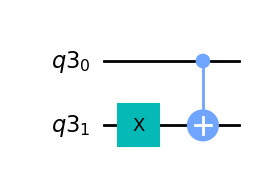

In [15]:
# cnot_01 |10> = |10>

backend = Aer.get_backend('unitary_simulator')
dec = 2                                 # Number of decimals for the matrix elements.
qr = QuantumRegister(2)                 # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr, name='circuit') # Create the circuit.
qc.x(1)
qc.cx(0,1)                              # Apply the CNOT gate with control qubit q0 and target qubit q1:

print('\n', Statevector.from_instruction(qc))
qc.draw(output='mpl')


 Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


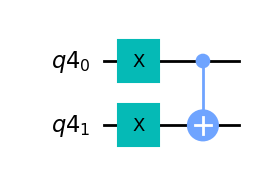

In [16]:
# cnot_01 |11> = |01>

backend = Aer.get_backend('unitary_simulator')
dec = 2                                 # Number of decimals for the matrix elements.
qr = QuantumRegister(2)                 # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr, name='circuit') # Create the circuit.
qc.x(0), qc.x(1) 
qc.cx(0,1)                              # Apply the CNOT gate with control qubit q0 and target qubit q1:

print('\n', Statevector.from_instruction(qc))
qc.draw(output='mpl')

# SWAP gate

The [SWAP](https://qiskit.org/documentation/stubs/qiskit.circuit.library.SwapGate.html) gate is a two-qubit gate used to swap the states between two qubits. Used mostly during qubit routing in order to match the topology (graph connectivity) of a specific quantum device.

The action of the SWAP gate can be represented by: 

$$|a,b\rangle \rightarrow |b,a\rangle.$$

$$SWAP|ab\rangle = |ba\rangle.$$

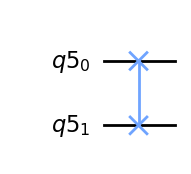

In [17]:
# SWAP gate:

qr = QuantumRegister(2) # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr) # Create the circuit.
qc.swap(1,0)
qc.draw(output='mpl')  

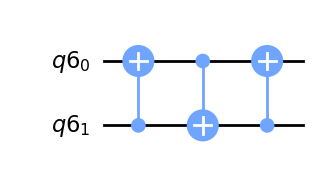

In [18]:
# SWAP gate decomposition into CNOTs:

qr = QuantumRegister(2) # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr) # Create the circuit.
qc.cnot(1,0), qc.cnot(0,1), qc.cnot(1,0)
qc.draw(output='mpl')  

From right to left:

$$ SWAP = CX_{10}CX_{01}CX_{10} = \Big(|0\rangle\langle 0|\otimes \mathbb{I} +|1\rangle\langle 1|\otimes X\Big)\Big(\mathbb{I} \otimes |0\rangle\langle 0| + X \otimes |1 \rangle \langle 1|\Big)\Big(|0\rangle\langle 0|\otimes \mathbb{I} +|1\rangle\langle 1|\otimes X\Big).$$

$$SWAP = \frac{1}{2}\sum_{i=0}^3 \sigma_i \otimes \sigma_i = \frac{\mathbb{I}\otimes \mathbb{I} + X \otimes X + Y \otimes Y + Z \otimes Z}{2}.$$

Matrix representation:

In [19]:
(np.kron(outzero, np.eye(2)) + np.kron(outone, sigma1))@(np.kron(np.eye(2), outzero) + np.kron(sigma1, outone))@(np.kron(outzero, np.eye(2)) + np.kron(outone, sigma1))

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [20]:
(np.kron(np.eye(2), np.eye(2)) + np.kron(sigma1, sigma1) + np.kron(sigma2, sigma2)+np.kron(sigma3, sigma3))/2

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

# $CU$ gate

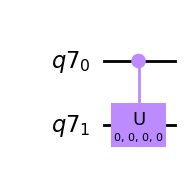

In [21]:
# Control-U gate:

qr = QuantumRegister(2) # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr) # Create the circuit.
qc.cu(theta=0, phi=0, lam=0, gamma=0, control_qubit=0, target_qubit=1)
qc.draw(output='mpl')  

In [22]:
#help(qc.cu)

A generic controlled single qubit rotation [$CU(\theta, \phi, \lambda, \gamma)$](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CUGate.html) gate can be written as:

\begin{equation}
CU(\theta, \phi, \lambda, \gamma) = I\otimes |0\rangle\langle 0\rangle + e^{i \gamma } U(\theta, \phi, \lambda, \gamma) \otimes |1 \rangle \langle 1|,
\end{equation}

where $e^{i \gamma }$ is a global phase shift that can be ignored.

In textbook convention, the $CU$ gate reads:

$$CU(\theta, \phi, \lambda, \gamma)=|0\rangle\langle 0|\otimes \mathbb{I} +|1\rangle\langle 1|\otimes U(\theta, \phi, \lambda, \gamma).$$

# $ZZ(t)$ gate

Deriving the ZZ gate via spectral decomposition theorem and parity trick.

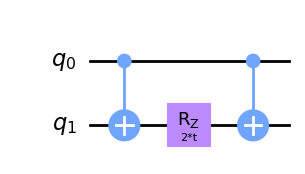

In [23]:
# Circuit for the ZZ(t) gate:

t = Parameter('t')
qc = QuantumCircuit(2, name='ZZ')
qc.cnot(0,1) # CX^{01}.
qc.rz(2 * t, 1) # R_z(2t).
qc.cnot(0,1) # CX^{01}.
qc.draw(output='mpl') # '!pip install pylatexenc' library is required to use 'MatplotlibDrawer'.

## Obtaining the $ZZ(t)$ gate via spectral decomposition theorem

Recall that a general single-qubit standard rotation gate can be written as:

$$ R_{\hat{n}}(\theta) \doteq e^{\pm i(\hat{n} \cdot \vec{\sigma})\theta /2}= \cos(\theta/2) I \pm i \sin(\theta/2)(\hat{n}\cdot \hat{\sigma}),$$

and after defining $\theta \doteq 2t$, one has

\begin{eqnarray}
RZ(2t) \equiv R_z(2t)&=& R_{(0,0,1)}(2t) \doteq \exp(- iZ2t/2) = e^{-itZ} 
= cos(t)I -isin(t)Z = 
\begin{bmatrix} e^{- it} & 0 \\0 &  e^{it}
\end{bmatrix} = e^{- it}|0 \rangle\langle 0| + e^{it} |1 \rangle\langle 1|.
\end{eqnarray}

With that, the $e^{-itZZ}$ gate (a.k.a [RZZ](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RZZGate.html)(2t)) can be written as follows:

\begin{equation}
R_{zz}(2t)= \exp(-it Z\otimes Z)=cos\left(t\right)(\mathbb{I}_2\otimes \mathbb{I}_2)-isin\left(t\right)(Z\otimes Z).
\end{equation}

The $e^{-itZ\otimes Z}$ gate is already diagonalized in the canonical basis a.k.a $Z$-basis. To see this is true, recall that Pauli operators are Normal operators, therefore, one can write the following spectral decomposition for the Pauli-$Z$ gate in the canonical basis: 

$$Z=\sum_{j=1}^{d} z_j |z_j \rangle \langle z_j|=|0\rangle\langle 0|-|1\rangle\langle 1|.$$

Note that the eigenvalues are $o_j = \pm 1$, since Pauli operators are represented by Involutory matrices. With that, one then has 

\begin{eqnarray}
Z\otimes Z &=& (|0\rangle\langle 0|-|1\rangle\langle 1|)\otimes(|0\rangle\langle 0|-|1\rangle\langle 1|) \tag{ZZ1}\\
&=& (|0\rangle\langle 0|) \otimes (|0\rangle\langle 0|) - (|0\rangle\langle 0|) \otimes (|1\rangle\langle 1|) - (|1\rangle\langle 1|) \otimes (|0\rangle\langle 0|) + (|1\rangle\langle 1|)\otimes(|1\rangle\langle 1|) \tag{ZZ2}\\
&=&|00\rangle\langle 00|-|01\rangle\langle 01|-|10\rangle\langle 10|+|11\rangle\langle 11| \tag{ZZ3} \\
&=& 
\begin{bmatrix} 
1 & 0 & 0 & 0 \\ 
0 & -1 & 0 & 0 \\ 
0 & 0 & -1 & 0 \\
0 & 0 & 0 & 1  
\end{bmatrix}.
\end{eqnarray}

- Eq. ($ZZ2$) was obtained from Eq. ($ZZ1$) using the distributive property for matrices:

$$(A+B) \otimes (C+D)=A\otimes C+A\otimes D+B\otimes C+B\otimes D.$$

- Eq. ($ZZ3$) was obtained from Eq. ($ZZ2$) using:

$$|a\rangle \langle c| \otimes |b\rangle \langle d|  = (|a\rangle \otimes |b\rangle)(\langle c| \otimes \langle d|) \equiv |ab\rangle\langle cd|.$$

Finally, 

\begin{eqnarray}
e^{-itZ \otimes Z}&=&e^{-it}|00\rangle\langle 00|+ e^{it}|01\rangle\langle 01|+ e^{it}|10\rangle\langle 10|+e^{-it}|11\rangle\langle 11|\tag{ZZ4} \\
&=&e^{-it}\bigg(|00\rangle\langle 00|+|11\rangle\langle 11|\bigg)+e^{it}\bigg(|01\rangle\langle 01|+|10\rangle\langle 10|\bigg) \\
&=& 
\begin{bmatrix} 
e^{-it} & 0 & 0 & 0 \\ 
0 & e^{it} & 0 & 0 \\ 
0 & 0 & e^{it} & 0 \\ 
0 & 0 & 0 & e^{-it}  
\end{bmatrix}.
\end{eqnarray}

- Eq. ($ZZ4$) is the result of acting an operator function (in this case $e^{i\theta \hat{O}}$) on a Normal matrix (in this case $Z\otimes Z$) represented by its spectral decomposition, according to:

$$ e^{i\theta\hat{O}} = \sum_{j=1}^n e^{i\theta o_j} |o_j\rangle \langle o_j| = e^{i\theta o_1} |o_{1}\rangle \langle o_{1}| + \cdots + e^{i\theta o_n} |o_{n}\rangle \langle o_{n}|.$$

In another perspective, when the matrix is diagonal, the operator function acts on its diagonal entries.

## Obtaining the $ZZ(t)$ gate via parity trick

- Computing the parity information by acting with the $ZZ$ operator.


To build quantum circuits corresponding to unitary evolution operators from exponentials of the form $U=e^{-i\hat{H}\Delta t}$, one can use the parity trick (see Ref. [[1](#ref1)], Sec. 4.7.3). In this case, one can obtain Eq. ($ZZ4$) by computing the parity information, as follows:

\begin{eqnarray}
(Z\otimes Z)|00\rangle &=& |00\rangle, \\
(Z\otimes Z)|10\rangle &=& -|10\rangle, \\
(Z\otimes Z)|01\rangle &=& -|01\rangle, \\
(Z\otimes Z)|11\rangle &=& |11\rangle. \\
\end{eqnarray}

One can see that a minus sign (phase) is introduced whenever the basis state has odd parity (01 or 10). Therefore, in the computational basis, a phase shift will be applied to the system according to $e^{i\Delta t}$ if the parity of the $n$ qubits in the computational basis is odd, otherwise, the phase shift will be $e^{-i\Delta t}$ if the parity is even (see Ref. [[1](#ref1)], Sec. 4.7.3). With this result, one can write:

\begin{eqnarray}
e^{-itZ \otimes Z} = e^{-it} |00\rangle\langle 00| + e^{it} |01\rangle\langle 01| + e^{it} |10 \rangle\langle 10| + e^{-it} |11 \rangle\langle 11|.
\end{eqnarray}

## Implementing the parity computation circuit

The above circuit can be obtained using the parity trick, where the first CNOT gate (a.k.a CX) computes the parity, and the second CNOT gate uncomputes the operation, since the CNOT gate is both a Unitary and Hermitian operator ($CX \cdot CX = CX \cdot CX^{\dagger} = \mathbb{I}$).

\begin{eqnarray}
CX^{01}\big(\mathbb{I} \otimes R_z(2t)\big)CX^{01} =
CX^{01}\big(\mathbb{I} \otimes e^{-itZ}\big)CX^{01},
\end{eqnarray}

where it was used $RZ(2t) = e^{-itZ}$.

Using the equation for a generic CU gate, one can write $CX^{01} = \mathbb{I} \otimes |0\rangle\langle 0\rangle + X \otimes |1 \rangle \langle 1|$. However, in textbook convention the CNOT gate reads $CX^{01}=|0\rangle\langle 0|\otimes \mathbb{I} +|1\rangle\langle 1|\otimes X$. One then has

\begin{eqnarray}
CX^{01}\big(\mathbb{I} \otimes e^{-itZ}\big)CX^{01}=CX^{01}\big( \mathbb{I} \otimes e^{-itZ}\big)\big(|0\rangle\langle 0|\otimes \mathbb{I}  +|1\rangle\langle 1|\otimes X \big).
\end{eqnarray}

From here, the distributive property of matrix multiplication over matrix addition yelds:

$$\big(\mathbb{I}\otimes e^{-itZ}\big)\big(|0\rangle\langle 0|\otimes \mathbb{I} +|1\rangle\langle 1|\otimes X \big) = \big(\mathbb{I}\otimes e^{-itZ}\big) \big(|0\rangle\langle 0|\otimes \mathbb{I} \big) + \big(\mathbb{I} \otimes e^{-itZ}\big)\big(|1\rangle\langle 1|\otimes X \big).$$

Using $(A\otimes B)\cdot(C\otimes D)=A\cdot C\otimes B\cdot D$, the right hand side becomes:

$$\Bigg[(\mathbb{I} \cdot |0\rangle\langle 0|) \otimes (e^{-itZ} \cdot \mathbb{I})\Bigg] + \Bigg[ (\mathbb{I} \cdot |1\rangle\langle 1|) \otimes (e^{-itZ} \cdot X) \Bigg] = \Bigg(|0\rangle\langle 0|\otimes e^{-itZ} \Bigg) + \Bigg(|1\rangle\langle 1|\otimes e^{-itZ}X \Bigg) .$$ 

With that, one then has:

\begin{eqnarray}
CX^{01}\bigg(\mathbb{I}\otimes e^{-itZ}\bigg)CX^{01} &=& CX^{01}\bigg(|0\rangle\langle 0|\otimes e^{-itZ} +|1\rangle\langle 1|\otimes e^{-itZ}X \bigg) = \bigg(|0\rangle\langle 0|\otimes \mathbb{I} +|1\rangle\langle 1|\otimes X \bigg)\bigg(|0\rangle\langle 0|\otimes e^{-itZ} +|1\rangle\langle 1|\otimes e^{-itZ}X \bigg).
\end{eqnarray}

Once again, applying the distributive property over matrix addition, the last term becomes

\begin{eqnarray}
CX^{01}\bigg(\mathbb{I}\otimes e^{-itZ}\bigg)CX^{01} &=& \bigg(|0\rangle\langle 0|\otimes \mathbb{I} \Bigg)\bigg(|0\rangle\langle 0|\otimes e^{-itZ} \Bigg)+\bigg(|0\rangle\langle 0|\otimes \mathbb{I} \Bigg)\bigg(|1\rangle\langle 1|\otimes e^{-itZ}X \Bigg)\\
&+&\bigg(|1\rangle\langle 1|\otimes X\bigg)\bigg(|0\rangle\langle 0|\otimes e^{-itZ}\bigg)+\bigg(|1\rangle\langle 1|\otimes X\bigg)\bigg(|1\rangle\langle 1|\otimes e^{-itZ}X\bigg).
\end{eqnarray}

Now, applying $(A\otimes B)\cdot(C\otimes D)=A\cdot C\otimes B\cdot D$, one gets

\begin{eqnarray}
CX^{01}\bigg(\mathbb{I}\otimes e^{-itZ}\bigg)CX^{01} &=& \Bigg(|0\rangle\langle 0|0\rangle\langle 0| \otimes e^{-itZ}\Bigg)+\Bigg(|0\rangle\langle 0|1\rangle\langle 1| \otimes e^{-itZ}X\Bigg)+\Bigg(|1\rangle\langle 1|0\rangle\langle 0| \otimes Xe^{-itZ}\Bigg)+\Bigg(|1\rangle\langle 1|1\rangle\langle 1| \otimes Xe^{-itZ}X\Bigg)\\
&=& \Bigg(|0\rangle\langle 0|\otimes e^{-itZ} \Bigg)+\Bigg(|1\rangle\langle 1|\otimes Xe^{-itZ}X \Bigg),
\end{eqnarray}

where it was used $\langle i|j\rangle = \delta_{ij}$ for a set of orthonormal eigenvectors. 

From here, recall that $e^{-itZ}=e^{- it}|0 \rangle\langle 0| + e^{it} |1 \rangle\langle 1|$, such that the last term writes

\begin{eqnarray}
CX^{01}\bigg(\mathbb{I}\otimes e^{-itZ}\bigg)CX^{01} &=& \Bigg(|0\rangle\langle 0|\otimes (e^{-it}|0\rangle\langle 0|+e^{it}|1\rangle\langle 1|)\Bigg) +\Bigg(|1\rangle\langle 1|\otimes X (e^{-it}|0\rangle\langle 0|+e^{it}|1\rangle\langle 1|)X\Bigg) \\
&=&\Bigg(|0\rangle\langle 0|\otimes (e^{-it}|0\rangle\langle 0|+e^{it}|1\rangle\langle 1|)\Bigg) +\Bigg(|1\rangle\langle 1|\otimes  (e^{-it}X|0\rangle\langle 0|X+e^{it}X|1\rangle\langle 1|X)\Bigg).
\end{eqnarray}

To compute $\big(e^{-it}X|0\rangle\langle 0|X+e^{it}X|1\rangle\langle 1|X\big)$, one should note that 

\begin{eqnarray}
X|0\rangle &=& |1\rangle, \\
X|1\rangle &=& |0\rangle, \\
(A|\psi\rangle)^{\dagger} &=& |\psi\rangle^{\dagger} A^{\dagger} = \langle \psi| A^{\dagger}, \\
X^{\dagger}&=&X,\\
\langle 0| X &=& (X|0\rangle)^{\dagger} = (|1\rangle)^{\dagger} = \langle 1|,\\
\langle 1| X &=& (X|1\rangle)^{\dagger} = (|0\rangle)^{\dagger} = \langle 0|.
\end{eqnarray}

Finally,
\begin{eqnarray}
CX^{01}(\mathbb{I}\otimes e^{-itZ})CX^{01}&=& \Bigg(|0\rangle\langle 0|\otimes (e^{-it}|0\rangle\langle 0|+e^{it}|1\rangle\langle 1|)\Bigg) + \Bigg(|1\rangle\langle 1|\otimes (e^{-it}|1\rangle\langle 1|+e^{it}|0\rangle\langle 0|)\Bigg) \\
&=& \Bigg(e^{-it}|0\rangle\langle 0|\otimes|0\rangle\langle 0|+e^{it}|0\rangle\langle 0|\otimes|1\rangle\langle 1|\Bigg) + \Bigg(e^{-it}|1\rangle\langle 1|\otimes|1\rangle\langle 1|+e^{it}|1\rangle\langle 1|\otimes|0\rangle\langle 0|\Bigg) \\
&=& e^{-it}|00\rangle\langle 00| + e^{it}|01\rangle\langle 01| + e^{-it}|11\rangle\langle 11|+ e^{it}|10\rangle\langle 10| \\
&=& e^{-itZ \otimes Z},
\end{eqnarray}

where it was used the left–distributive property $$A \otimes (B+C) = A\otimes B+A\otimes C,$$ and the identity $$(|a\rangle \langle c|) \otimes (|b\rangle \langle d|)=(|a\rangle \otimes |b\rangle)(\langle c| \otimes \langle d|) \equiv |ab\rangle \langle cd|.$$

Q.E.D.

# $XX(t)$ gate

Deriving the XX gate via spectral decomposition theorem and single-qubit rotations.

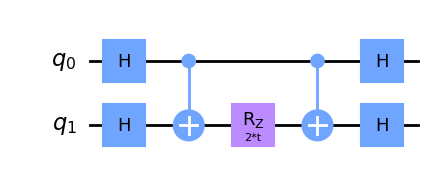

In [24]:
# Circuit for the XX(t) gate:

t = Parameter('t')
qc = QuantumCircuit(2, name='XX')
qc.h([0,1])
qc.cx(0, 1)
qc.rz(2 * t, 1)
qc.cx(0, 1)
qc.h([0,1])
qc.draw(output='mpl')

## Obtaining the $XX(t)$ gate via spectral decomposition theorem

One should note that $e^{-itXX}$ is shorthand for $e^{-itX \otimes X}.$ Recall that Pauli operators are all involutory operators, i.e, their eigenvalues are $o_j = \pm 1$. According to the spectral decomposition theorem for Normal matrices, one then has:

$$X = \sum_{j=1}^{d} x_j |x_j \rangle \langle x_j| = |+\rangle\langle +|-|-\rangle\langle -|,$$

where $$ |\pm\rangle \equiv \frac{1}{\sqrt{2}}(|0\rangle\pm|1\rangle) $$ 

denotes the two orthonormal eigenstates (eigenvectors) of the Pauli $X$-gate according to:

$$X |+\rangle = \frac{1}{\sqrt{2}}(X|0\rangle+X|1\rangle)=\frac{1}{\sqrt{2}}(|1\rangle+|0\rangle)=|+\rangle,$$
$$X |-\rangle = \frac{1}{\sqrt{2}}(X|0\rangle-X|1\rangle) =\frac{1}{\sqrt{2}}(|1\rangle-|0\rangle)=-|-\rangle.$$

With that, one gets:

\begin{eqnarray}
XX &\equiv& X\otimes X = (|+\rangle\langle +|-|-\rangle\langle -|)\otimes(|+\rangle\langle +|-|-\rangle\langle -|) \tag{XX1}\\
&=& (|+\rangle\langle +|) \otimes (|+\rangle\langle +|) - (|+\rangle\langle +|) \otimes (|-\rangle\langle -|) - (|-\rangle\langle -|)\otimes (|+\rangle\langle +|) + (|-\rangle\langle -|) \otimes (|-\rangle\langle -|) \tag{XX2} \\
&=& (|++\rangle\langle ++|)-(|+-\rangle\langle +-|)-(|-+\rangle\langle -+|)+(|--\rangle\langle --|) \tag{XX3} \\
\implies e^{-itX \otimes X}
&=&e^{-it}|++\rangle\langle ++|+ e^{-it}|--\rangle\langle --|+e^{it}|+-\rangle\langle +-|+ e^{it}|-+\rangle\langle -+|\tag{XX4} \\
&=&e^{-it}\bigg(|++\rangle\langle ++|+|--\rangle\langle --|\bigg)+e^{it}\bigg(|+-\rangle\langle +-|+|-+\rangle\langle -+|\bigg).
\end{eqnarray}

- Eq. ($XX2$) was obtained from Eq. ($XX1$) using the distributive property for matrices:

$$(A+B) \otimes (C+D)=A\otimes C+A\otimes D+B\otimes C+B\otimes D.$$

- Eq. ($XX3$) was obtained from Eq. ($XX2$) using:

$$|a\rangle \langle c| \otimes |b\rangle \langle d|  = (|a\rangle \otimes |b\rangle)(\langle c| \otimes \langle d|) \equiv |ab\rangle\langle cd|.$$

- Just as before, Eq. ($XX4$) is the result of acting an operator function (in this case $e^{i\theta \hat{O}}$) on a Normal matrix (in this case $X\otimes X$) represented by its corresponding spectral decomposition. 

As one can see, the $e^{-itX\otimes X}$ gate is not diagonalized in the $Z$-basis. Since measurements are computed in the $Z$-basis, one must apply a Hadamard gate to change between the $X$ and $Z$ bases according to

\begin{eqnarray}
|+\rangle &=& H|0\rangle = R_y(\pi/2)|0\rangle, \\
|-\rangle &=& H|1\rangle = R_y(-\pi/2)|0\rangle, \\
\langle +| &=& (|+\rangle)^{\dagger} = (H|0\rangle)^{\dagger} = (|0\rangle)^{\dagger}H^{\dagger} = \langle 0|H,\\
\langle -| &=& (|-\rangle)^{\dagger} = (H|1\rangle)^{\dagger} = (|1\rangle)^{\dagger}H^{\dagger} = \langle 1|H.
\end{eqnarray}

With that, and using $A |v\rangle \otimes B |w\rangle = (A\otimes B)(|v\rangle \otimes |w\rangle),$ one can write the respective outer products as follows:

\begin{eqnarray}
|++\rangle\langle ++| &=& (H|0\rangle \otimes H|0\rangle)(\langle 0| H \otimes \langle 0| H)\\
&=& \Bigg[(H \otimes H)(|0\rangle \otimes |0\rangle)\Bigg]\Bigg[(\langle 0| \otimes \langle 0|)(H \otimes H)\Bigg] \\
&=&(H\otimes H)|00\rangle\langle 00|(H\otimes H),\\
\end{eqnarray}

\begin{eqnarray}
|--\rangle\langle --| &=& (H|1\rangle \otimes H|1\rangle)(\langle 1| H\otimes \langle 1| H)\\
&=& \Bigg[(H \otimes H)(|1\rangle \otimes |1\rangle)\Bigg]\Bigg[(\langle 1| \otimes \langle 1|)(H \otimes H)\Bigg] \\
&=&(H\otimes H)|11\rangle\langle 11|(H\otimes H),
\end{eqnarray}

\begin{eqnarray}
|+-\rangle\langle +-| &=& (H|0\rangle \otimes H|1\rangle)(\langle 0| H \otimes \langle 1| H)\\
&=& \Bigg[(H \otimes H)(|0\rangle \otimes |1\rangle)\Bigg]\Bigg[(\langle 0| \otimes \langle 1|)(H \otimes H)\Bigg] \\
&=&(H\otimes H)|01\rangle\langle 01|(H\otimes H),
\end{eqnarray}

\begin{eqnarray}
|-+\rangle\langle -+| &=& (H|1\rangle \otimes H|0\rangle)(\langle 1| H \otimes \langle 0| H)\\
&=& \Bigg[(H \otimes H)(|1\rangle \otimes |0\rangle)\Bigg]\Bigg[(\langle 1| \otimes \langle 0|)(H \otimes H)\Bigg] \\
&=&(H\otimes H)|10\rangle\langle 10|(H\otimes H).
\end{eqnarray}

Finally,

\begin{eqnarray}
e^{-it X \otimes X} &=& e^{-it}\Bigg[(H\otimes H)|00\rangle\langle 00|(H\otimes H)+(H\otimes H)|11\rangle\langle 11|(H\otimes H)\Bigg]+e^{it}\Bigg[(H\otimes H)|01\rangle\langle 01|(H\otimes H)+(H\otimes H)|10\rangle\langle 10|(H\otimes H)\Bigg] \\
&=& (H\otimes H)\Bigg[e^{-it}\Bigg(|00\rangle\langle 00|+|11\rangle\langle 11|\Bigg)+e^{it}\Bigg(|01\rangle\langle 01|+|10\rangle\langle 10|\Bigg)\Bigg](H\otimes H)\\
&=& (H\otimes H) e^{-it Z \otimes Z}(H\otimes H) \\
&=& (H\otimes H) C_x^{01}\big(\mathbb{I}\otimes e^{-itZ}\big) C_x^{01}(H\otimes H) \\
&=& (H\otimes H) C_x^{01}\big(\mathbb{I}\otimes R_Z(2t)\big) C_x^{01}(H\otimes H),
\end{eqnarray}

where it was used the previously obtained decomposition of the $ZZ(t)$ gate, given by

\begin{eqnarray}
ZZ(t)=e^{-itZ\otimes Z} &=& e^{-it}\Bigg(|00\rangle\langle 00|+|11\rangle\langle 11|\Bigg)+e^{it}\Bigg(|01\rangle\langle 01|+|10\rangle\langle 10|\Bigg)=C_x^{01}\big(\mathbb{I}\otimes e^{-itZ}\big)C_x^{01},
\end{eqnarray}

and the fact that $e^{-itZ} = R_z(2t)$.

Q.E.D.

From the fact that 

$$H|0\rangle = R_y(\pi/2)|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \equiv |+\rangle,$$ 

and 

$$H|1\rangle = R_y(-\pi/2)|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) \equiv |-\rangle,$$ 

one equivalent quantum circuit is:

\begin{eqnarray}
(R_y(-\pi/2) \otimes R_y(-\pi/2)) C_x^{01}\big(\mathbb{I}\otimes R_Z(2t)\big) C_x^{01}(R_y(\pi/2) \otimes R_y(\pi/2)).
\end{eqnarray}

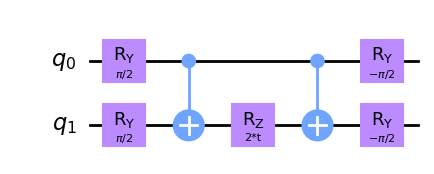

In [25]:
# Equivalent circuit for the XX(t) gate:

qc = QuantumCircuit(2, name='XX')
qc.ry(np.pi/2,[0,1])
qc.cnot(0,1)
qc.rz(2 * t, 1)
qc.cnot(0,1)
qc.ry(-np.pi/2,[0,1])
qc.draw(output='mpl')

## Obtaining the $XX(t)$ gate via single qubit rotations

Another method to obtain the $XX(t) \equiv e^{(-it X\otimes X)}$ gate is by performing single-qubit rotations on the $ZZ(t)$ gate. To this end, note that

$$R_y(\pi/2) Z R_y(-\pi/2) = X,$$

such that 

$$\Bigg(R_y(\pi/2) \otimes R_y(\pi/2) \Bigg) (Z\otimes Z) \Bigg(R_y(-\pi/2) \otimes R_y(-\pi/2) \Bigg) = X\otimes X.$$


The corresponding $XX(t)^{(0,1)}$ circuit acting on qubits 0 and 1 is then obtained by exponentiating the $Z\otimes Z$ operator in the equation above:

\begin{align}
\Bigg(R_y(\pi/2) \otimes R_y(\pi/2) \Bigg) e^{(-itZ\otimes Z)} \Bigg(R_y(-\pi/2) \otimes R_y(-\pi/2) \Bigg) =& \\
e^{-i \frac{\pi}{4}(Y\otimes I+I\otimes Y)} e^{(-itZ\otimes Z)} e^{i \frac{\pi}{4}(Y\otimes I+I\otimes Y)} =& \cdots \\
=& e^{(-it X\otimes X)} \\
\equiv& XX(t).
\end{align}

The full procedure can be found at [ibmq-qsim-sup-mat.ipynb](https://github.com/qiskit-community/open-science-prize-2021/blob/main/ibmq-qsim-sup-mat.ipynb), where the following identity was used: 

$$R_{\hat{n}_j}(\theta_1) \otimes R_{\hat{n}_k}(\theta_2)=e^{-i(\hat{n}_j\cdot \vec{\sigma})\theta_1/2} \otimes e^{-i(\hat{n}_k\cdot \vec{\sigma})\theta_2/2} = e^{-\frac{i}{2}(\hat{\sigma}_j\theta_1 \otimes I+I \otimes \hat{\sigma}_k\theta_2)},$$

which follows from

$$e^A \otimes e^B=e^{A \otimes \mathbb{I}_n} e^{\mathbb{I}_m \otimes B}=e^{A \otimes \mathbb{I}_n + \mathbb{I}_m \otimes B}.$$

# $YY(t)$ gate

Deriving the YY gate via spectral decomposition theorem.

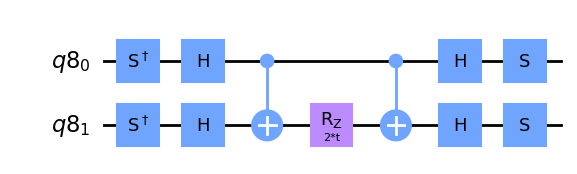

In [26]:
# Circuit for the YY(t) gate:

t = Parameter('t')
qr = QuantumRegister(2)
qc = QuantumCircuit(qr, name='YY')
qc.sdg([0,1])
qc.h([0,1])
qc.cx(0, 1)
qc.rz(2 * t, 1)
qc.cx(0, 1)
qc.h([0,1])
qc.s([0,1])
qc.draw(output='mpl')

One should note that $e^{-itYY}$ is shorthand for $e^{-itY \otimes Y}$. Following the same thought process as before, one writes the spectral decomposition of the Pauli operator $Y$ in the basis of its eigenvectors:

$$Y=\sum_{j=1}^{d} y_j |y_j \rangle \langle y_j|=|\oplus\rangle\langle \oplus|-|\ominus\rangle\langle \ominus|,$$

where

\begin{eqnarray}
|+y\rangle &\equiv& |\oplus\rangle \doteq \frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle), \\
|-y\rangle &\equiv& |\ominus\rangle \doteq \frac{1}{\sqrt{2}}(|0\rangle-i|1\rangle),
\end{eqnarray}

denotes the two orthonormal eigenstates (eigenvectors) of the Pauli $Y$-gate. 

With that, one has

\begin{eqnarray}
YY &\equiv& Y \otimes Y = (|\oplus\rangle\langle \oplus|-|\ominus\rangle\langle \ominus|)\otimes(|\oplus\rangle\langle \oplus|-|\ominus\rangle\langle \ominus|) \tag{YY1}\\
&=& (|\oplus\rangle\langle \oplus|) \otimes (|\oplus\rangle\langle \oplus|) - (|\oplus\rangle\langle \oplus|) \otimes (|\ominus\rangle\langle \ominus|) - (|\ominus\rangle\langle \ominus|)\otimes(|\oplus\rangle\langle \oplus|) + (|\ominus\rangle\langle \ominus|)\otimes(|\ominus\rangle\langle \ominus|) \tag{YY2}\\
&=&|\oplus\oplus\rangle\langle \oplus\oplus|-|\oplus\ominus\rangle\langle \oplus\ominus|-|\ominus\oplus\rangle\langle \ominus\oplus|+|\ominus\ominus\rangle\langle \ominus\ominus| \tag{YY3}.
\end{eqnarray}

- Eq. ($YY2$) was obtained from Eq. ($YY1$) using the distributive property for matrices:

$$(A+B) \otimes (C+D)=A\otimes C+A\otimes D+B\otimes C+B\otimes D.$$

- Eq. ($YY3$) was obtained from Eq. ($YY2$) using:

$$|a\rangle \langle c| \otimes |b\rangle \langle d|  = (|a\rangle \otimes |b\rangle)(\langle c| \otimes \langle d|) \equiv |ab\rangle\langle cd|.$$

Henceforth, 

\begin{eqnarray}
e^{-itY \otimes Y}&=&e^{-it}|\oplus\oplus\rangle\langle \oplus\oplus|+ e^{it}|\oplus\ominus\rangle\langle \oplus\ominus|+ e^{it}|\ominus\oplus\rangle\langle \ominus\oplus|+e^{-it}|\ominus\ominus\rangle\langle \ominus\ominus|\tag{YY4} \\
&=&e^{-it}\Bigg(|\oplus\oplus\rangle\langle \oplus\oplus|+|\ominus\ominus\rangle\langle \ominus\ominus|\Bigg) + e^{it}\Bigg(|\oplus\ominus\rangle\langle \oplus\ominus|+|\ominus\oplus\rangle\langle \ominus\oplus|\Bigg).
\end{eqnarray}

- Once more, Eq. ($YY4$) is the result of acting an operator function (in this case $e^{i\theta \hat{O}}$) on a Normal matrix (in this case $Y\otimes Y$) with the spectral decomposition, according to:

$$ e^{i\theta\hat{O}} = \sum_{j=1}^n e^{i\theta o_j} |o_j\rangle \langle o_j| = e^{i\theta o_1} |o_{1}\rangle \langle o_{1}| + \cdots + e^{i\theta o_n} |o_{n}\rangle \langle o_{n}|.$$

As one can see, the $e^{-itY\otimes Y}$ gate is not diagonalized in the $Z$-basis. Since measurements are computed in the $Z$-basis, the next step is to apply a basis change, as follows:

\begin{eqnarray}
|\oplus\rangle &=& SH|0\rangle = R_x(-\pi/2)|0\rangle, \\
|\ominus\rangle &=& SH|1\rangle = R_x(\pi/2)|0\rangle, \\
\langle \oplus| &=& (|\oplus\rangle)^{\dagger} = (SH|0\rangle)^{\dagger} = (|0\rangle)^{\dagger} (SH)^{\dagger} = \langle 0| H^{\dagger}S^{\dagger}=\langle 0|HS^{\dagger},\\
\langle \ominus| &=& (|\ominus\rangle)^{\dagger} = (SH|1\rangle)^{\dagger} = (|1\rangle)^{\dagger} (SH)^{\dagger} = \langle 1| H^{\dagger}S^{\dagger}=\langle 1|HS^{\dagger}.
\end{eqnarray}

With that, and using $A |v\rangle \otimes B |w\rangle = (A\otimes B)(|v\rangle \otimes |w\rangle),$ one can write the respective outer products as follows:

\begin{eqnarray}
|\oplus\oplus\rangle\langle \oplus\oplus| &=& (SH|0\rangle \otimes SH|0\rangle)(\langle 0| HS^{\dagger} \otimes \langle 0| HS^{\dagger})\\
&=& \Bigg[(SH \otimes SH)(|0\rangle \otimes |0\rangle)\Bigg]\Bigg[(\langle 0| \otimes \langle 0|)(HS^{\dagger} \otimes HS^{\dagger})\Bigg] \\
&=&(S\otimes S)(H\otimes H)|00\rangle\langle 00|(H\otimes H)(S^{\dagger}\otimes S^{\dagger}),
\end{eqnarray}

\begin{eqnarray}
|\ominus\ominus\rangle\langle \ominus\ominus| &=& (SH|1\rangle \otimes SH|1\rangle)(\langle 1| HS^{\dagger} \otimes \langle 1| HS^{\dagger})\\
&=& \Bigg[(SH \otimes SH)(|1\rangle \otimes |1\rangle)\Bigg]\Bigg[(\langle 1| \otimes \langle 1|)(HS^{\dagger} \otimes HS^{\dagger})\Bigg] \\
&=&(S\otimes S)(H\otimes H)|11\rangle\langle 11|(H\otimes H)(S^{\dagger}\otimes S^{\dagger}),
\end{eqnarray}

\begin{eqnarray}
|\oplus\ominus\rangle\langle \oplus\ominus| &=& (SH|0\rangle \otimes SH|1\rangle)(\langle 0| HS^{\dagger} \otimes \langle 1| HS^{\dagger})\\
&=& \Bigg[(SH \otimes SH)(|0\rangle \otimes |1\rangle)\Bigg]\Bigg[(\langle 0| \otimes \langle 1|)(HS^{\dagger} \otimes HS^{\dagger})\Bigg] \\
&=&(S\otimes S)(H\otimes H)|01\rangle\langle 01|(H\otimes H)(S^{\dagger}\otimes S^{\dagger}),
\end{eqnarray}

\begin{eqnarray}
|\ominus\oplus\rangle\langle \ominus\oplus| &=& (SH|1\rangle \otimes SH|0\rangle)(\langle 1| HS^{\dagger} \otimes \langle 0| HS^{\dagger})\\
&=& \Bigg[(SH \otimes SH)(|1\rangle \otimes |0\rangle)\Bigg]\Bigg[(\langle 1| \otimes \langle 0|)(HS^{\dagger} \otimes HS^{\dagger})\Bigg] \\
&=&(S\otimes S)(H\otimes H)|10\rangle\langle 10|(H\otimes H)(S^{\dagger}\otimes S^{\dagger}).
\end{eqnarray}

Finally,

\begin{eqnarray}
e^{-itY\otimes Y} &=& e^{-it}\Bigg((S\otimes S)(H\otimes H)|00\rangle\langle 00|(H\otimes H)(S^{\dagger}\otimes S^{\dagger})+(S\otimes S)(H\otimes H)|11\rangle\langle 11|(H\otimes H) (S^{\dagger}\otimes S^{\dagger})\Bigg) \\
&+& e^{it}\Bigg((S\otimes S) (H\otimes H)|01\rangle\langle 01|(H\otimes H)(S^{\dagger}\otimes S^{\dagger}) + (S\otimes S)(H\otimes H)|10\rangle\langle 10|(H\otimes H)(S^{\dagger}\otimes S^{\dagger}) \Bigg)\\
&=& (S\otimes S)(H\otimes H) \Bigg[e^{-it}\Bigg(|00\rangle\langle 00|+|11\rangle\langle 11|\Bigg)+e^{it} \Bigg(|01\rangle\langle 01|+|10\rangle\langle 10|\Bigg)\Bigg](H\otimes H)(S^{\dagger}\otimes S^{\dagger}) \\
& =& (S\otimes S) (H\otimes H)e^{-itZ \otimes Z}(H\otimes H)(S^{\dagger}\otimes S^{\dagger}) \\
&=&(S \otimes S) (H \otimes H) C_x^{01}\big(\mathbb{I}\otimes e^{-itZ}\big) C_x^{01} (H \otimes H) (S^{\dagger} \otimes S^{\dagger}) \\
&=& (S \otimes S) (H \otimes H) C_x^{01} \big(\mathbb{I}\otimes R_z(2t)\big) C_x^{01} (H \otimes H) (S^{\dagger} \otimes S^{\dagger}).
\end{eqnarray}

Where it was used the previously obtained result for the decomposition of the $ZZ(t)=e^{-itZ\otimes Z}$ gate and the equality $e^{-itZ} = R_z(2t)$.

Q.E.D.

From the fact that 

$$SH|0\rangle = R_x(-\pi/2)|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle) \equiv |\oplus\rangle,$$ 

and 

$$SH|1\rangle = R_x(\pi/2)|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle-i|1\rangle) \equiv |\ominus\rangle,$$ 

one equivalent quantum circuit is:

$$(R_x(-\pi/2) \otimes R_x(-\pi/2)) C_x^{01} \big(\mathbb{I}\otimes R_z(2t)\big) C_x^{01} (R_x(\pi/2) \otimes R_x(\pi/2)).$$

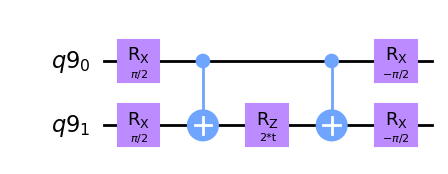

In [27]:
# Equivalent circuit for the YY(t) gate:

qr = QuantumRegister(2)
qc = QuantumCircuit(qr, name='YY')
qc.rx(np.pi/2,[0,1])
qc.cnot(0,1)
qc.rz(2 * t, 1)
qc.cnot(0,1)
qc.rx(-np.pi/2,[0,1])
qc.draw(output='mpl')

# Verifying outer products

Let $H$ and $S$ be the single-qubit Hadamard gate and single-qubit phase gate, respectively. And let $|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$ be the eigenvectors of the $ZZ$ gate.

Given the eigenvectors $|+\rangle$, $|-\rangle$, $|++\rangle$, $|+-\rangle$, $|-+\rangle$, and $|--\rangle$ of the $XX$ gate, the following holds:

\begin{eqnarray}
|++\rangle\langle ++|&=&(H\otimes H)|00\rangle\langle 00|(H\otimes H).\\
|--\rangle\langle --|&=&(H\otimes H)|11\rangle\langle 11|(H\otimes H).\\
|+-\rangle\langle +-|&=&(H\otimes H)|01\rangle\langle 01|(H\otimes H).\\
|-+\rangle\langle -+|&=&(H\otimes H)|10\rangle\langle 10|(H\otimes H).\\
\end{eqnarray}

Given the eigenvectors $|\oplus\rangle$, $|\ominus\rangle$, $|\oplus \oplus\rangle$, $|\oplus\ominus\rangle$, $|\ominus\oplus\rangle$, and $|\ominus\ominus\rangle$ of the $YY$ gate, the following holds:

\begin{eqnarray}
|\oplus\oplus\rangle\langle \oplus\oplus|&=&(S\otimes S)(H\otimes H)|00\rangle\langle 00|(H\otimes H)(S^{\dagger}\otimes S^{\dagger}).\\
|\ominus\ominus\rangle\langle \ominus\ominus|&=&(S\otimes S)(H\otimes H)|11\rangle\langle 11|(H\otimes H)(S^{\dagger}\otimes S^{\dagger}).\\
|\oplus\ominus\rangle\langle \oplus\ominus|&=&(S\otimes S)(H\otimes H)|01\rangle\langle 01|(H\otimes H)(S^{\dagger}\otimes S^{\dagger}).\\
|\ominus\oplus\rangle\langle \ominus\oplus|&=&(S\otimes S)(H\otimes H)|10\rangle\langle 10|(H\otimes H)(S^{\dagger}\otimes S^{\dagger}).\\
\end{eqnarray}

## $|++\rangle\langle ++|=(H\otimes H)|00\rangle\langle 00|(H\otimes H)$

**Verifying with NumPy:**

In [28]:
(np.kron(plus.T,plus.T)@np.kron(plus,plus) == (np.kron(had,had))@zeros@(np.kron(had,had))).all()

True

In [29]:
np.kron(plus.T,plus.T)@np.kron(plus,plus)

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [30]:
(np.kron(had,had))@zeros@(np.kron(had,had))

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

## $|--\rangle\langle --|=(H\otimes H)|11\rangle\langle 11|(H\otimes H)$

**Verifying with NumPy:**

In [31]:
(np.kron(minus.T,minus.T)@np.kron(minus,minus) == (np.kron(had,had))@ones@(np.kron(had,had))).all()

True

In [32]:
np.kron(minus.T,minus.T)@np.kron(minus,minus)

array([[ 0.25, -0.25, -0.25,  0.25],
       [-0.25,  0.25,  0.25, -0.25],
       [-0.25,  0.25,  0.25, -0.25],
       [ 0.25, -0.25, -0.25,  0.25]])

In [33]:
(np.kron(had,had))@ones@(np.kron(had,had))

array([[ 0.25, -0.25, -0.25,  0.25],
       [-0.25,  0.25,  0.25, -0.25],
       [-0.25,  0.25,  0.25, -0.25],
       [ 0.25, -0.25, -0.25,  0.25]])

## $|+-\rangle\langle +-|=(H\otimes H)|01\rangle\langle 01|(H\otimes H)$

**Verifying with NumPy:**

In [34]:
(np.kron(plus.T,minus.T)@np.kron(plus,minus) == (np.kron(had,had))@(zerone)@(np.kron(had,had))).all()

True

In [35]:
np.kron(plus.T,minus.T)@np.kron(plus,minus)

array([[ 0.25, -0.25,  0.25, -0.25],
       [-0.25,  0.25, -0.25,  0.25],
       [ 0.25, -0.25,  0.25, -0.25],
       [-0.25,  0.25, -0.25,  0.25]])

In [36]:
(np.kron(had,had))@(zerone)@(np.kron(had,had))

array([[ 0.25, -0.25,  0.25, -0.25],
       [-0.25,  0.25, -0.25,  0.25],
       [ 0.25, -0.25,  0.25, -0.25],
       [-0.25,  0.25, -0.25,  0.25]])

## $|-+\rangle\langle -+|=(H\otimes H)|10\rangle\langle 10|(H\otimes H)$

**Verifying with NumPy:**

In [37]:
(np.kron(minus.T,plus.T)@np.kron(minus,plus) == (np.kron(had,had))@(onezero)@(np.kron(had,had))).all()

True

In [38]:
np.kron(minus.T,plus.T)@np.kron(minus,plus)

array([[ 0.25,  0.25, -0.25, -0.25],
       [ 0.25,  0.25, -0.25, -0.25],
       [-0.25, -0.25,  0.25,  0.25],
       [-0.25, -0.25,  0.25,  0.25]])

In [39]:
(np.kron(had,had))@(onezero)@(np.kron(had,had))

array([[ 0.25,  0.25, -0.25, -0.25],
       [ 0.25,  0.25, -0.25, -0.25],
       [-0.25, -0.25,  0.25,  0.25],
       [-0.25, -0.25,  0.25,  0.25]])

## $(|+\rangle \langle+|)⊗(|−\rangle \langle−|)=(|+−\rangle \langle+−|)$

**Verifying with NumPy:**

In [40]:
#(|+⟩⟨+|)⊗(|−⟩⟨−|) == (|+−⟩⟨+−|)
(np.kron(np.outer(plus.T,plus),np.outer(minus.T,minus)) == (np.kron(plus.T, minus.T))@(np.kron(plus, minus))).all()

True

In [41]:
(np.kron(plus.T, minus.T))@(np.kron(plus, minus))

array([[ 0.25, -0.25,  0.25, -0.25],
       [-0.25,  0.25, -0.25,  0.25],
       [ 0.25, -0.25,  0.25, -0.25],
       [-0.25,  0.25, -0.25,  0.25]])

In [42]:
np.kron(np.outer(plus.T,plus),np.outer(minus.T,minus))

array([[ 0.25, -0.25,  0.25, -0.25],
       [-0.25,  0.25, -0.25,  0.25],
       [ 0.25, -0.25,  0.25, -0.25],
       [-0.25,  0.25, -0.25,  0.25]])

## $(|-\rangle \langle-|)⊗(|+\rangle \langle+|) = (|−+\rangle \langle−+|)$

**Verifying with NumPy:**

In [43]:
# (|-⟩⟨-|)⊗(|+⟩⟨+|) == (|−+⟩⟨−+|) >>> True
(np.kron(np.outer(minus.T,minus),np.outer(plus.T,plus)) == (np.kron(minus.T, plus.T))@(np.kron(minus, plus))).all()

True

In [44]:
np.kron(np.outer(minus.T,minus),np.outer(plus.T,plus))

array([[ 0.25,  0.25, -0.25, -0.25],
       [ 0.25,  0.25, -0.25, -0.25],
       [-0.25, -0.25,  0.25,  0.25],
       [-0.25, -0.25,  0.25,  0.25]])

In [45]:
(np.kron(minus.T, plus.T))@(np.kron(minus, plus))

array([[ 0.25,  0.25, -0.25, -0.25],
       [ 0.25,  0.25, -0.25, -0.25],
       [-0.25, -0.25,  0.25,  0.25],
       [-0.25, -0.25,  0.25,  0.25]])